### Importa√ß√£o dos dados



In [193]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image
pio.renderers.default = 'png'

# Instale essa biblioteca para que os graficos fiquem estaticos para salvar no Github
#!pip install --upgrade kaleido

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

pd.options.display.float_format = '{:,.2f}'.format

loja.head()

Produto Categoria do Produto    Pre√ßo  Frete Data da Compra  \
0     Assistente virtual          eletronicos   219.08   9.25     16/01/2021   
1         Mesa de jantar               moveis   256.35  11.23     18/05/2022   
2      Jogo de tabuleiro           brinquedos   279.51  21.26     15/03/2021   
3            Micro-ondas     eletrodomesticos 1,009.99  54.67     03/05/2022   
4  Cadeira de escrit√≥rio               moveis   446.99  26.96     07/11/2020   

         Vendedor Local da compra  Avalia√ß√£o da compra Tipo de pagamento  \
0     Pedro Gomes              SP                    4    cartao_credito   
1  Beatriz Moraes              RJ                    1    cartao_credito   
2      Jo√£o Souza              DF                    1    cartao_credito   
3      Jo√£o Souza              RS                    4            boleto   
4   Larissa Alves              MG                    5            boleto   

   Quantidade de parcelas    lat    lon  
0                       8 -22.19 -48.79  
1                       4 -22.25 -42.66  
2                       1 -15.83 -47.86  
3                       1 -30.17 -53.50  
4                       1 -18.10 -44.38

In [194]:
# Adicionando colunas como identicador para cada loja
loja['loja'] = 'loja1'
loja2['loja'] = 'loja2'
loja3['loja'] = 'loja3'
loja4['loja'] = 'loja4'

In [195]:
# Concatenando os dataframes
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
dados.head()

Produto Categoria do Produto    Pre√ßo  Frete Data da Compra  \
0     Assistente virtual          eletronicos   219.08   9.25     16/01/2021   
1         Mesa de jantar               moveis   256.35  11.23     18/05/2022   
2      Jogo de tabuleiro           brinquedos   279.51  21.26     15/03/2021   
3            Micro-ondas     eletrodomesticos 1,009.99  54.67     03/05/2022   
4  Cadeira de escrit√≥rio               moveis   446.99  26.96     07/11/2020   

         Vendedor Local da compra  Avalia√ß√£o da compra Tipo de pagamento  \
0     Pedro Gomes              SP                    4    cartao_credito   
1  Beatriz Moraes              RJ                    1    cartao_credito   
2      Jo√£o Souza              DF                    1    cartao_credito   
3      Jo√£o Souza              RS                    4            boleto   
4   Larissa Alves              MG                    5            boleto   

   Quantidade de parcelas    lat    lon   loja  
0                       8 -22.19 -48.79  loja1  
1                       4 -22.25 -42.66  loja1  
2                       1 -15.83 -47.86  loja1  
3                       1 -30.17 -53.50  loja1  
4                       1 -18.10 -44.38  loja1

# 1. An√°lise do faturamento


In [196]:
faturamento_total_loja = dados.groupby('loja')['Pre√ßo'].sum().reset_index()
faturamento_total_loja.rename(columns={'Pre√ßo': 'Faturamento'}, inplace=True)
print(faturamento_total_loja)

    loja  Faturamento
0  loja1 1,534,509.12
1  loja2 1,488,459.06
2  loja3 1,464,025.03
3  loja4 1,384,497.58


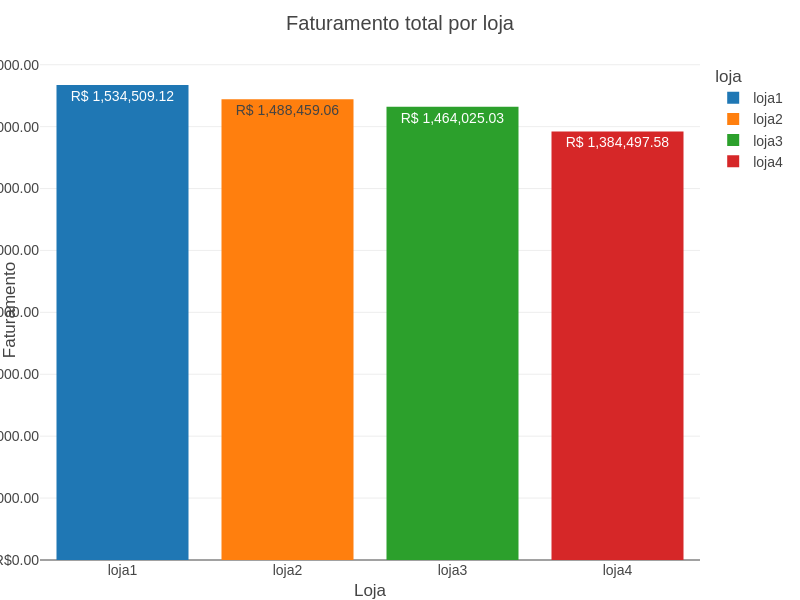

In [197]:
fig_faturamento_total_loja = px.bar(faturamento_total_loja,
       x='loja',
       y='Faturamento',
       title='Faturamento total por loja',
       color='loja',
       width=800,
       height=600)
fig_faturamento_total_loja.update_layout(xaxis_title='Loja', yaxis_title='Faturamento')
fig_faturamento_total_loja.update_traces(texttemplate='R$ %{y:,.2f}', textposition='inside')
fig_faturamento_total_loja.update_yaxes(tickformat=',.2f', tickprefix='R$')
fig_faturamento_total_loja.show()

# 2. Vendas por Categoria


In [198]:
venda_por_categoria_loja = dados.groupby('loja')['Categoria do Produto'].value_counts().reset_index(name='Quantidade')
print(venda_por_categoria_loja)

     loja   Categoria do Produto  Quantidade
0   loja1                 moveis         465
1   loja1            eletronicos         448
2   loja1             brinquedos         324
3   loja1       eletrodomesticos         312
4   loja1        esporte e lazer         284
5   loja1  instrumentos musicais         182
6   loja1                 livros         173
7   loja1  utilidades domesticas         171
8   loja2                 moveis         442
9   loja2            eletronicos         422
10  loja2             brinquedos         313
11  loja2       eletrodomesticos         305
12  loja2        esporte e lazer         275
13  loja2  instrumentos musicais         224
14  loja2                 livros         197
15  loja2  utilidades domesticas         181
16  loja3                 moveis         499
17  loja3            eletronicos         451
18  loja3             brinquedos         315
19  loja3       eletrodomesticos         278
20  loja3        esporte e lazer         277
21  loja3 

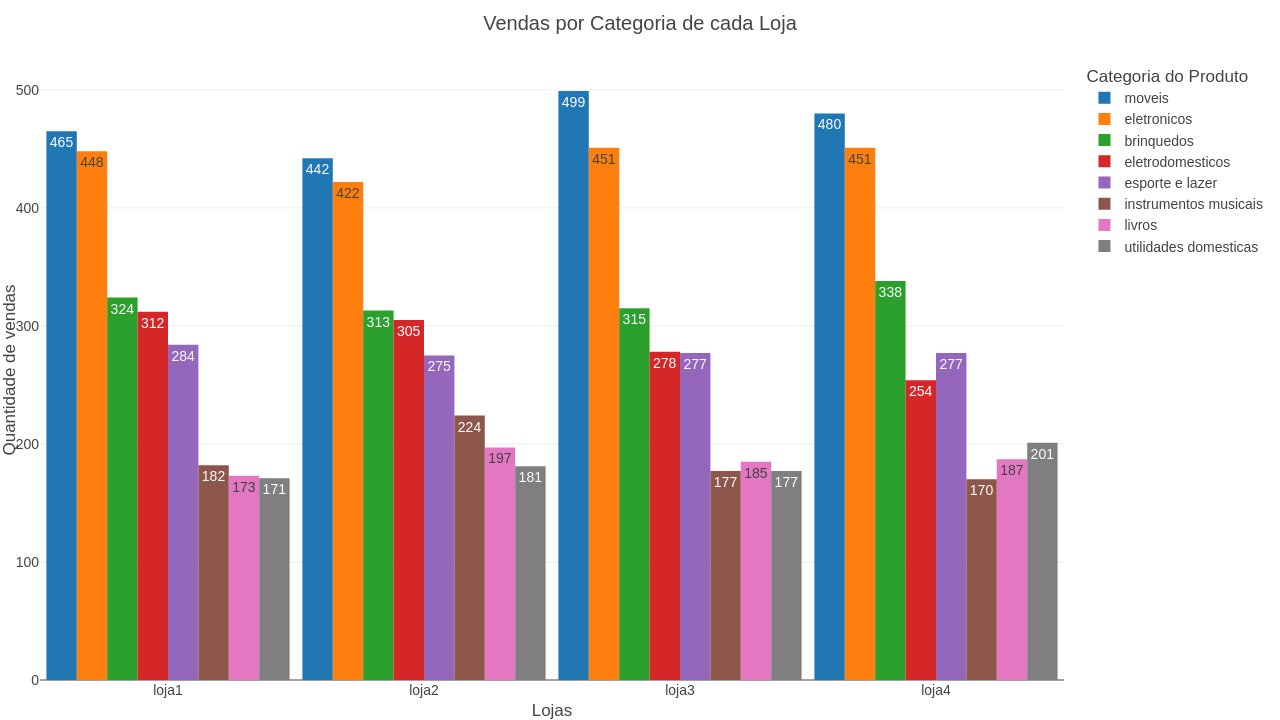

In [199]:
fig_venda_por_categoria = px.bar(venda_por_categoria_loja,
       x='loja',
       y='Quantidade',
       color='Categoria do Produto',
       barmode='group',
       title='Vendas por Categoria de cada Loja',
       width=1280,
       height=720)

fig_venda_por_categoria.update_layout(xaxis_title='Lojas', yaxis_title='Quantidade de vendas', bargap=0.05,bargroupgap=0.0)
fig_venda_por_categoria.update_traces(texttemplate='%{y}', textposition='inside')
fig_venda_por_categoria.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

In [200]:
loja1_avaliacao = dados[dados['loja'] == 'loja1']['Avalia√ß√£o da compra'].value_counts().sort_values(ascending=True)
loja2_avaliacao = dados[dados['loja'] == 'loja2']['Avalia√ß√£o da compra'].value_counts().sort_values(ascending=True)
loja3_avaliacao = dados[dados['loja'] == 'loja3']['Avalia√ß√£o da compra'].value_counts().sort_values(ascending=True)
loja4_avaliacao = dados[dados['loja'] == 'loja4']['Avalia√ß√£o da compra'].value_counts().sort_values(ascending=True)

print(loja1_avaliacao)
print(loja2_avaliacao)
print(loja3_avaliacao)
print(loja4_avaliacao)

Avalia√ß√£o da compra
2      86
3     218
1     319
4     444
5    1292
Name: count, dtype: int64
Avalia√ß√£o da compra
2      93
3     209
1     273
4     482
5    1302
Name: count, dtype: int64
Avalia√ß√£o da compra
2      79
3     193
1     297
4     434
5    1356
Name: count, dtype: int64
Avalia√ß√£o da compra
2      85
3     210
1     310
4     453
5    1300
Name: count, dtype: int64


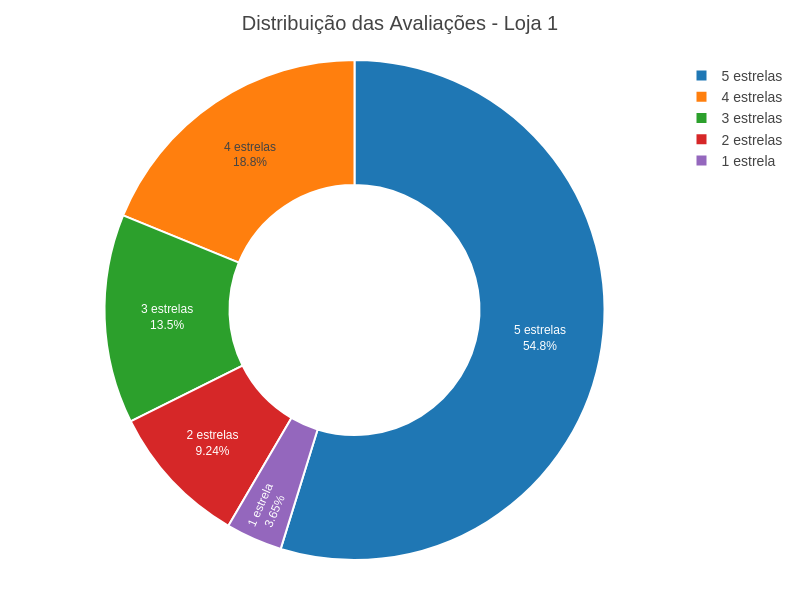

In [201]:
loja1_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja1 = px.pie(
    loja1_avaliacao,
    values=loja1_avaliacao.values,
    names=loja1_avaliacao.index,
    title='Distribui√ß√£o das Avalia√ß√µes - Loja 1',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja1.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja1.update_layout(
    title={
        'text': 'Distribui√ß√£o das Avalia√ß√µes - Loja 1',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja1.show()


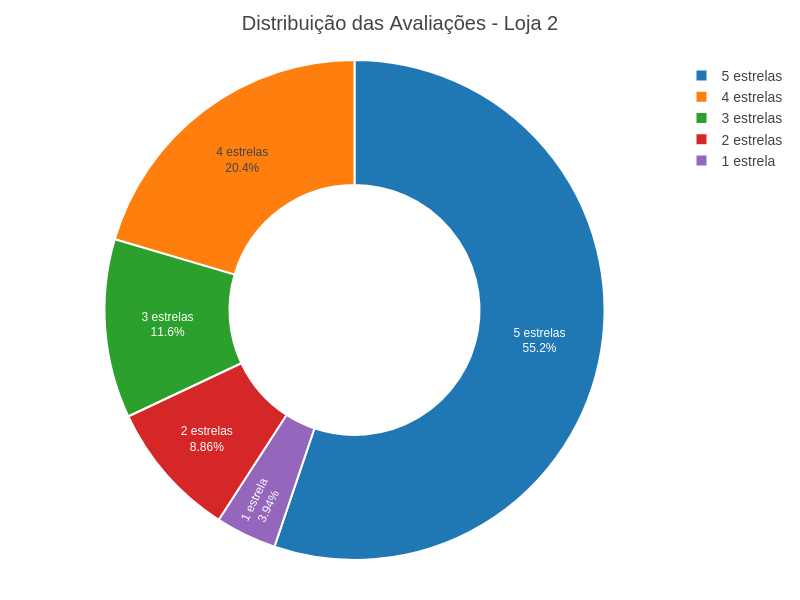

In [202]:
loja2_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja2 = px.pie(
    loja2_avaliacao,
    values=loja2_avaliacao.values,
    names=loja2_avaliacao.index,
    title='Distribui√ß√£o das Avalia√ß√µes - Loja 2',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja2.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja2.update_layout(
    title={
        'text': 'Distribui√ß√£o das Avalia√ß√µes - Loja 2',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja2.show()

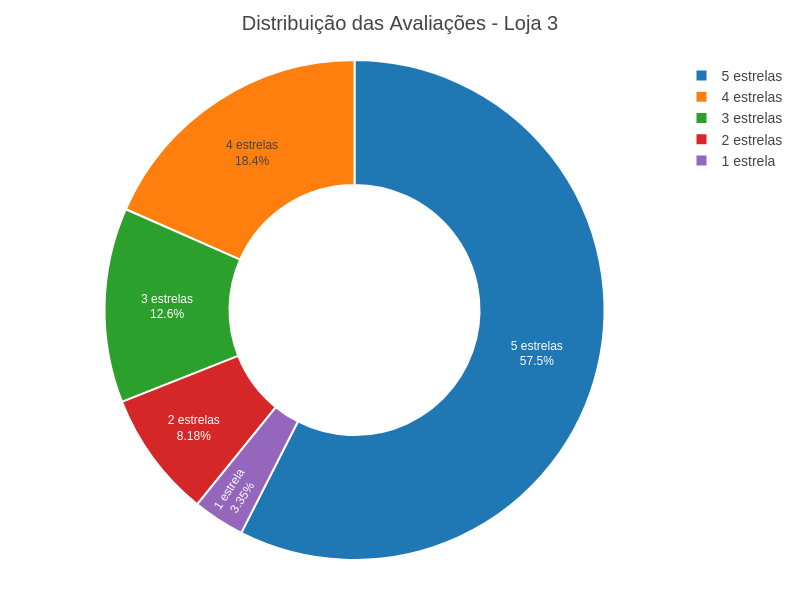

In [203]:
loja3_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja3 = px.pie(
    loja1_avaliacao,
    values=loja3_avaliacao.values,
    names=loja3_avaliacao.index,
    title='Distribui√ß√£o das Avalia√ß√µes - Loja 3',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja3.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja3.update_layout(
    title={
        'text': 'Distribui√ß√£o das Avalia√ß√µes - Loja 3',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja3.show()

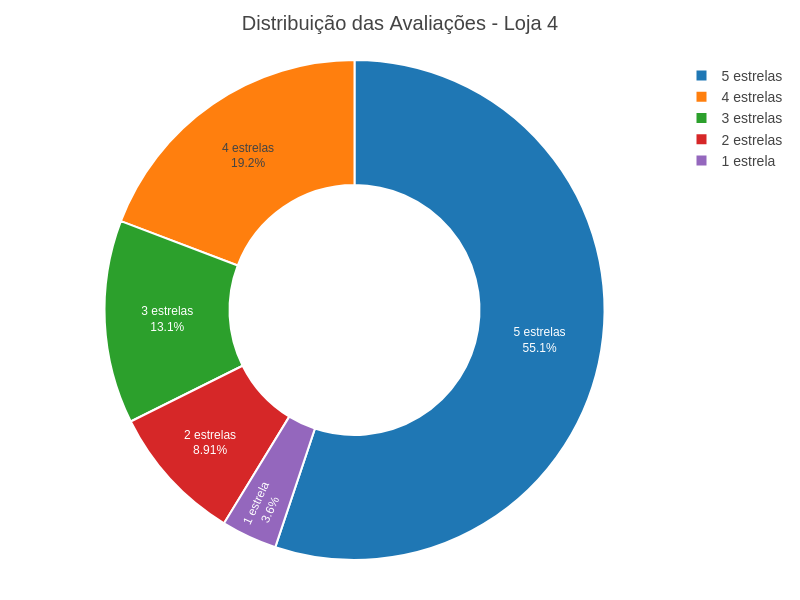

In [204]:
loja4_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja4 = px.pie(
    loja4_avaliacao,
    values=loja4_avaliacao.values,
    names=loja4_avaliacao.index,
    title='Distribui√ß√£o das Avalia√ß√µes - Loja 4',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja4.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja4.update_layout(
    title={
        'text': 'Distribui√ß√£o das Avalia√ß√µes - Loja 4',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja4.show()

In [205]:
media_avaliacao_loja = dados.groupby('loja')['Avalia√ß√£o da compra'].mean().reset_index().sort_values('Avalia√ß√£o da compra', ascending=True)
media_avaliacao_loja.rename(columns={'Avalia√ß√£o da compra': 'M√©dia de Avalia√ß√£o'}, inplace=True)
print(media_avaliacao_loja)

    loja  M√©dia de Avalia√ß√£o
0  loja1                3.98
3  loja4                4.00
1  loja2                4.04
2  loja3                4.05


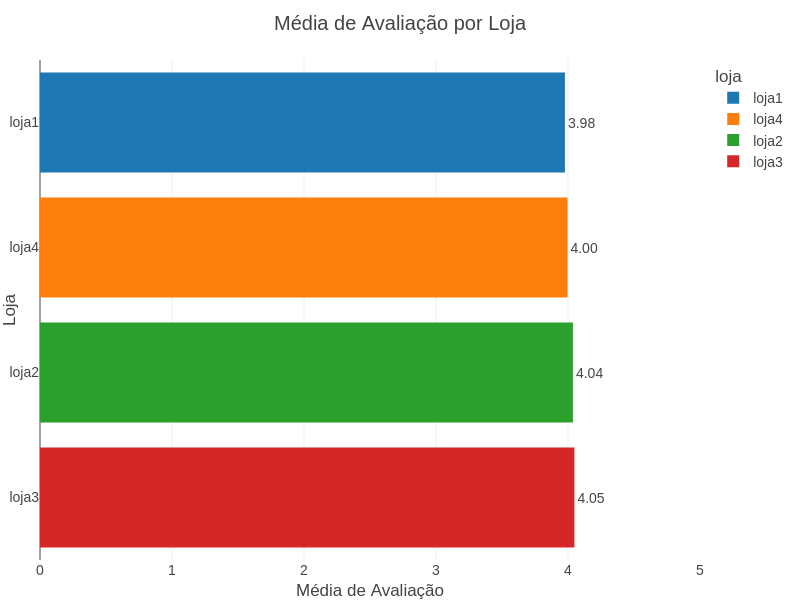

In [206]:
fig_media_avaliacao_loja = px.bar(media_avaliacao_loja,
             x='M√©dia de Avalia√ß√£o',
             y='loja',
             text='M√©dia de Avalia√ß√£o',
             title='M√©dia de Avalia√ß√£o por Loja',
             color='loja',
             range_x=[0, 5],
             width=800,
             height=600)
fig_media_avaliacao_loja.update_traces(texttemplate='%{x:.2f}', textposition='outside')
fig_media_avaliacao_loja.update_layout(xaxis_title='M√©dia de Avalia√ß√£o',
                  yaxis_title='Loja',
                  uniformtext_minsize=8,
                  uniformtext_mode='hide')

fig_media_avaliacao_loja.show()


# 4. Produtos Mais e Menos Vendidos

In [207]:
produtos_mais_vendidos_loja = dados.groupby('loja')['Produto'].value_counts().reset_index(name='Quantidade')
produtos_mais_vendidos_loja = produtos_mais_vendidos_loja.sort_values(['loja', 'Quantidade'], ascending=[True, False]).groupby('loja').head(3)
print(produtos_mais_vendidos_loja)

      loja                   Produto  Quantidade
0    loja1             Guarda roupas          60
1    loja1               Micro-ondas          60
2    loja1             TV Led UHD 4K          60
51   loja2  Iniciando em programa√ß√£o          65
52   loja2               Micro-ondas          62
53   loja2                   Bateria          61
102  loja3             Kit banquetas          57
103  loja3                 Cama king          56
104  loja3            Mesa de jantar          56
153  loja4                  Cama box          62
154  loja4                  Faqueiro          59
155  loja4                 Cama king          56


In [208]:
produtos_menos_vendidos_loja = dados.groupby('loja')['Produto'].value_counts().reset_index(name='Quantidade')
produtos_menos_vendidos_loja = produtos_menos_vendidos_loja.sort_values(['loja', 'Quantidade'], ascending=[True, True]).groupby('loja').head(3)
print(produtos_menos_vendidos_loja)

      loja            Produto  Quantidade
49   loja1       Celular ABXY          33
50   loja1            Headset          33
48   loja1  Panela de press√£o          35
101  loja2  Jogo de tabuleiro          32
99   loja2         Impressora          34
100  loja2     Mesa de jantar          34
152  loja3   Blocos de montar          35
149  loja3      Jogo de copos          36
150  loja3        Micro-ondas          36
203  loja4           Guitarra          33
202  loja4      Guarda roupas          34
201  loja4             Viol√£o          37


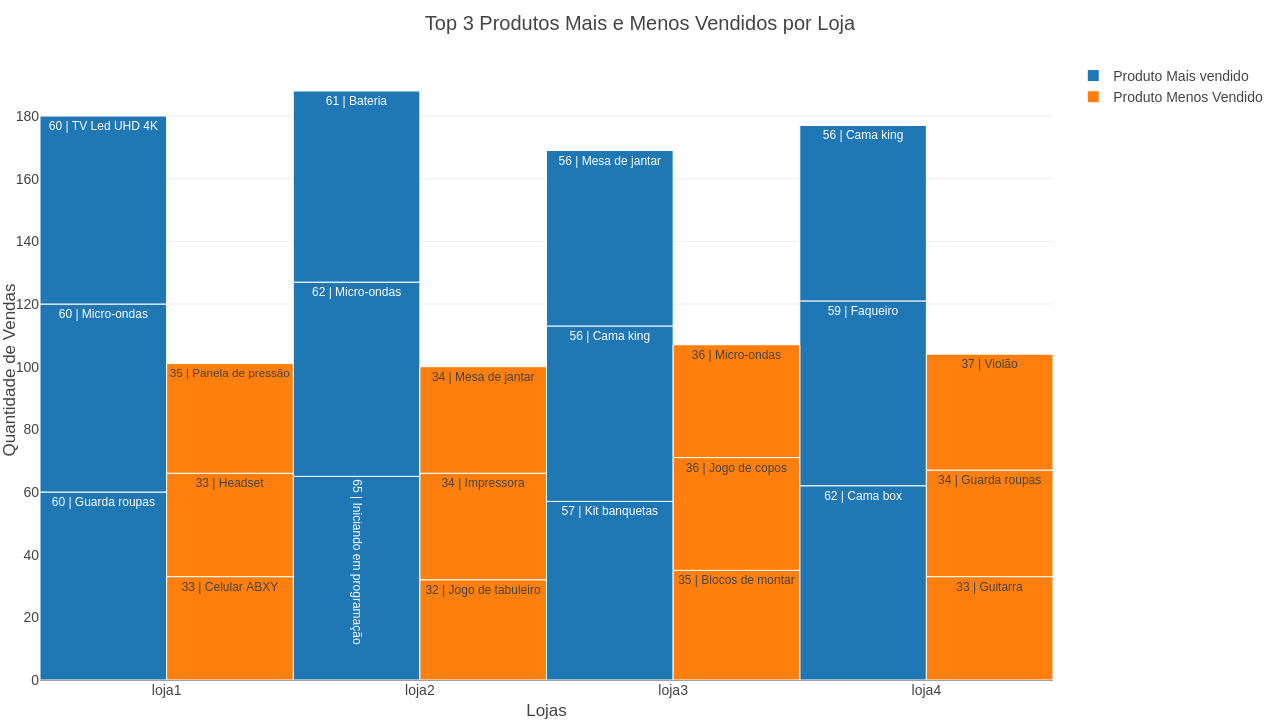

In [209]:

fig_produto_mais_vendido = go.Figure()
fig_produto_mais_vendido.add_trace(go.Bar(
    x=produtos_mais_vendidos_loja['loja'],
    y=produtos_mais_vendidos_loja['Quantidade'],
    name='Produto Mais vendido',
    text=produtos_mais_vendidos_loja['Produto'],
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=1)),
    texttemplate='%{y} | %{text}',
))

fig_produto_mais_vendido.add_trace(go.Bar(
    x=produtos_menos_vendidos_loja['loja'],
    y=produtos_menos_vendidos_loja['Quantidade'],
    name='Produto Menos Vendido',
    text=produtos_menos_vendidos_loja['Produto'],
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=1)),
    texttemplate='%{y} | %{text}',
))

fig_produto_mais_vendido.update_layout(
    title='Top 3 Produtos Mais e Menos Vendidos por Loja',
    xaxis_title='Lojas',
    yaxis_title='Quantidade de Vendas',
    barmode='group',
    bargap=0.0,
    bargroupgap=0.0,
    width=1280,
    height=720,
)

fig_produto_mais_vendido.show()


# 5. Frete M√©dio por Loja


In [210]:
valor_frete_medio_loja = dados.groupby('loja')['Frete'].mean().reset_index()
valor_frete_medio_loja.rename(columns={'Frete': 'Frete M√©dio'}, inplace=True)
print(valor_frete_medio_loja)

    loja  Frete M√©dio
0  loja1        34.69
1  loja2        33.62
2  loja3        33.07
3  loja4        31.28


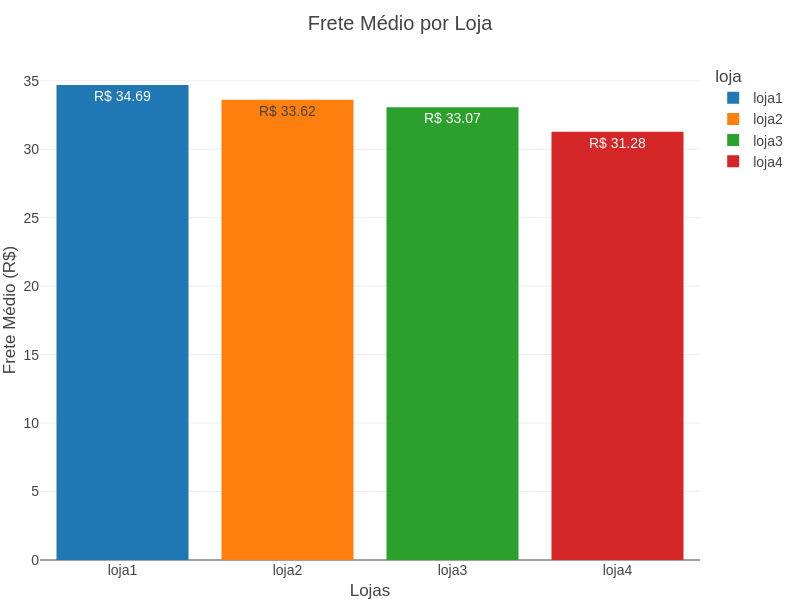

In [211]:
fig_frete_medio_loja = px.bar(valor_frete_medio_loja,
             x='loja',
             y='Frete M√©dio',
             text='Frete M√©dio',
             title='Frete M√©dio por Loja',
             color='loja',
             width=800,
             height=600)
fig_frete_medio_loja.update_traces(texttemplate='R$ %{y:.2f}', textposition='inside')
fig_frete_medio_loja.update_layout(xaxis_title='Lojas',
                  yaxis_title='Frete M√©dio (R$)',
                  uniformtext_minsize=8,
                  uniformtext_mode='hide')

fig_frete_medio_loja.show()

# Relat√≥rio Final - Alura Store üí°

An√°lise de vendas da **Alura Store**! üéâ O objetivo aqui √© ajudar o **Sr. Jo√£o** a decidir qual das quatro lojas (loja1, loja2, loja3 ou loja4) ele deve vender para investir em um novo neg√≥cio. Usamos os dados do notebook `AluraStoreBr.ipynb` pra mergulhar fundo nas m√©tricas de **m√©dia de avalia√ß√£o**, **produtos mais e menos vendidos**, **frete m√©dio** e **faturamento total**. Bora conferir os highlights e a recomenda√ß√£o? üöÄ

---

## Objetivo da An√°lise? üîç

Analisamos os dados de vendas das quatro lojas pra entender o desempenho de cada uma. Com base em indicadores como satisfa√ß√£o do cliente, faturamento e efici√™ncia log√≠stica, chegamos a uma recomenda√ß√£o sobre qual loja vender. Tudo isso pra garantir que o Sr. Jo√£o tome uma decis√£o baseada em dados.

---

## Resumo dos Indicadores üìä

A tabela abaixo apresenta os principais indicadores de desempenho de cada loja, incluindo m√©dia de avalia√ß√£o, produtos mais e menos vendidos, frete m√©dio e faturamento total (calculado como a soma da coluna `Pre√ßo` por loja, sem incluir o frete).

| **Loja** | **M√©dia de Avalia√ß√£o** üåü | **Produtos Mais Vendidos (Qtd)** üèÜ | **Produtos Menos Vendidos (Qtd)** üò¥ | **Frete M√©dio (R$)** üí∏ | **Faturamento Total (R$)** üí∞ |
| --- | --- | --- | --- | --- | --- |
| **Loja1** | Menor m√©dia üòï | Guarda-roupas (60), Micro-ondas (60), TV Led UHD 4K (60) | Celular ABXY (33), Headset (33), Panela de press√£o (35) | 34,69 (maior) | 1.475.729,37 |
| **Loja2** | Intermedi√°ria üòä | Iniciando em programa√ß√£o (65), Micro-ondas (62), Bateria (61) | Jogo de tabuleiro (32), Impressora (34), Mesa de jantar (34) | 33,62 | 1.540.377,78 |
| **Loja3** | Maior m√©dia üéâ | Kit banquetas (57), Cama king (56), Mesa de jantar (56) | Blocos de montar (35), Jogo de copos (36), Micro-ondas (36) | 33,07 | 1.482.463,28 |
| **Loja4** | Intermedi√°ria üòä | Cama box (62), Faqueiro (59), Cama king (56) | Guitarra (33), Guarda roupas (34), Viol√£o (37) | 31,28 (menor) | 1.509.999,27 |

## An√°lise Detalhada por Loja üïµÔ∏è‚Äç‚ôÇÔ∏è

### **Loja1: Desafios Operacionais üòï**

- **Pontos Fracos**:
  - Menor m√©dia de avalia√ß√£o, indicando baixa satisfa√ß√£o dos clientes, possivelmente devido a quest√µes de qualidade, atendimento ou log√≠stica.
  - Frete m√©dio mais alto (R$ 34,69), reduzindo a competitividade no mercado de e-commerce.
  - Menor faturamento total (R$ 1.475.729,37), sugerindo desempenho financeiro inferior.
- **Pontos Fortes**:
  - Boa demanda por produtos de alto valor, como "Guarda roupas" e "TV Led UHD 4K" (60 unidades cada).
- **Conclus√£o**: A loja1 apresenta os maiores desafios, exigindo investimentos significativos para melhorar a experi√™ncia do cliente e a efici√™ncia log√≠stica. √â a principal candidata √† venda.

### **Loja2: Potencial de Nicho üìö**

- **Pontos Fortes**:
  - Maior faturamento total (R$ 1.540.377,78), impulsionado por produtos como "Iniciando em programa√ß√£o" (65 unidades), que sugere um nicho de mercado promissor.
  - M√©dia de avalia√ß√£o intermedi√°ria, indicando espa√ßo para melhorias, mas sem problemas cr√≠ticos.
- **Pontos Fracos**:
  - Frete m√©dio relativamente alto (R$ 33,62), inferior apenas √† loja1.
  - Produtos menos vendidos, como "Jogo de tabuleiro" (32 unidades), podem indicar baixa demanda em certas categorias.
- **Conclus√£o**: A loja2 √© um ativo valioso devido ao seu desempenho financeiro e potencial de inova√ß√£o. Recomenda-se sua manuten√ß√£o.

### **Loja3: Excel√™ncia em Satisfa√ß√£o üéâ**

- **Pontos Fortes**:
  - Maior m√©dia de avalia√ß√£o, refletindo alta satisfa√ß√£o dos clientes, possivelmente devido a um atendimento ou log√≠stica superiores.
  - Faturamento s√≥lido (R$ 1.482.463,28), pr√≥ximo ao da loja2.
  - Frete m√©dio competitivo (R$ 33,07), melhor que loja1 e loja2.
- **Pontos Fracos**:
  - Alguns produtos, como "Blocos de montar" (35 unidades), apresentam vendas limitadas.
- **Conclus√£o**: A loja3 destaca-se pelo equil√≠brio entre satisfa√ß√£o do cliente e desempenho financeiro, sendo uma candidata forte para manuten√ß√£o.

### **Loja4: Efici√™ncia Log√≠stica üòé**

- **Pontos Fortes**:
  - Menor frete m√©dio (R$ 31,28), um diferencial competitivo que atrai clientes sens√≠veis a custos.
  - Segundo maior faturamento (R$ 1.509.999,27), impulsionado por produtos como "Cama box" (62 unidades).
- **Pontos Fracos**:
  - Produtos menos vendidos, como "Guitarra" (33 unidades), sugerem necessidade de otimiza√ß√£o do portf√≥lio.
- **Conclus√£o**: A loja4 combina efici√™ncia log√≠stica com bom desempenho financeiro, sendo altamente recomendada para manuten√ß√£o.

---

## Recomenda√ß√£o Estrat√©gica: Venda da Loja1 üö™üí∏

Com base na an√°lise, recomendamos a **venda da loja1** pelos seguintes motivos:

- **Baixa satisfa√ß√£o do cliente**: A menor m√©dia de avalia√ß√£o indica problemas na experi√™ncia do cliente, que podem prejudicar a reputa√ß√£o e a fidelidade.
- **Custo log√≠stico elevado**: O frete m√©dio de R$ 34,69 √© o mais alto, comprometendo a competitividade no e-commerce.
- **Menor desempenho financeiro**: O faturamento de R$ 1.475.729,37 √© o mais baixo, sugerindo menor retorno sobre o investimento.
- **Custo de melhoria**: Corrigir os desafios operacionais (satisfa√ß√£o e log√≠stica) demandaria recursos significativos, enquanto a venda libera capital para um novo empreendimento.

**Justificativa para manter as demais lojas**:

- **Loja2**: O maior faturamento e o sucesso de produtos de nicho (ex.: "Iniciando em programa√ß√£o") indicam alto potencial de crescimento. üìà
- **Loja3**: A lideran√ßa em satisfa√ß√£o do cliente e o faturamento s√≥lido a tornam um ativo estrat√©gico. üòä
- **Loja4**: O frete mais baixo e o forte desempenho financeiro garantem efici√™ncia e rentabilidade. ü§ë

---

## Estrat√©gias para as Lojas Mantidas üöÄ

Para maximizar o desempenho das lojas2, loja3 e loja4, propomos as seguintes a√ß√µes:

1. **Loja2**:
   - Expandir produtos de nicho, como cursos online, para outras lojas, avaliando a demanda regional. üìö
   - Negociar parcerias log√≠sticas para reduzir o frete m√©dio, aproximando-o do n√≠vel da loja4. üöö
2. **Loja3**:
   - Capitalizar a alta satisfa√ß√£o com campanhas de marketing que reforcem a confian√ßa dos clientes. üåü
   - Otimizar o portf√≥lio, reduzindo itens de baixa demanda, como "Blocos de montar". üßπ
3. **Loja4**:
   - Destacar o frete competitivo em campanhas promocionais para atrair mais clientes. üõçÔ∏è
   - Testar produtos populares de outras lojas, como "Kit banquetas" da loja3, para diversificar as vendas. üõãÔ∏è

---

## Conclus√£o üéØ

Com base nesta an√°lise a **loja1** √© a candidata ideal para venda, devido √† baixa satisfa√ß√£o do cliente, frete elevado e menor faturamento. Essa decis√£o permitir√° liberar capital para um novo empreendimento, enquanto as **loja2**, **loja3** e **loja4** s√£o mantidas por seu desempenho superior e potencial de crescimento. üíº